In [1]:
using Flux
using Flux: @epochs, onehotbatch, throttle
using Statistics: mean, var, std
using Plots
pyplot()

┌ Info: Recompiling stale cache file /home/rasmus/.julia/compiled/v1.0/Flux/QdkVy.ji for Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/rasmus/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/rasmus/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190


Plots.PyPlotBackend()

In [2]:
add_dim(x::Array) = reshape(x, (1,size(x)...));

In [3]:
TR = Float32;
TC = ComplexF32;

In [4]:
M = 16;
constellation_dim = 2;
N = 32*M;
SNR = 20;
SNRlin = 10^(SNR/10) |> TR;

In [5]:
encoder = Chain(Dense(M, 32, Flux.relu), Dense(32, 32, Flux.relu), Dense(32, constellation_dim));
decoder = Chain(Dense(constellation_dim, 32, Flux.relu), Dense(32, 32, Flux.relu), Dense(32, M));

In [6]:
function model(X)
    X_seed = Flux.onehotbatch(1:M,1:M)
    s_seed = encoder(X_seed)
    s_seed = add_dim(s_seed[1,:] + 1im*s_seed[2,:])
    norm_factor = sqrt(mean(abs.(s_seed).^2))
    
    s = encoder(X)
    s = add_dim(s[1,:] + 1im*s[2,:]) / norm_factor
    𝜎 = sqrt(1/SNRlin) |> TR
    
    r = s + 𝜎 * randn(TC, 1, N)
    r = [real(r); imag(r)]
    Y = decoder(r)
    return Y
end    

model (generic function with 1 method)

In [7]:
loss(X) = Flux.logitcrossentropy(model(X), X);

In [8]:
opt = ADAM(0.001);
ps = params(encoder, decoder);

In [9]:
evalcb() = @show(loss(X));
@epochs 200 Flux.train!(loss, ps, data, opt, cb = throttle(evalcb, 5));

┌ Info: Epoch 1
└ @ Main /home/rasmus/.julia/packages/Flux/dkJUV/src/optimise/train.jl:105


UndefVarError: UndefVarError: data not defined

In [10]:
X_seed = Flux.onehotbatch(1:M,1:M)
s_seed = encoder(X_seed)
s_seed_cpx = add_dim(s_seed[1,:] + 1im*s_seed[2,:])
norm_factor = sqrt(mean(abs.(s_seed_cpx).^2))

s = encoder(X)
s = add_dim(s[1,:] + 1im*s[2,:]) / norm_factor
𝜎 = sqrt(1/SNRlin) |> TR

r = s + 𝜎 * randn(TC, 1, N)
r = [real(r); imag(r)]

UndefVarError: UndefVarError: X not defined

In [11]:
mean(abs.(s).^2)

UndefVarError: UndefVarError: s not defined

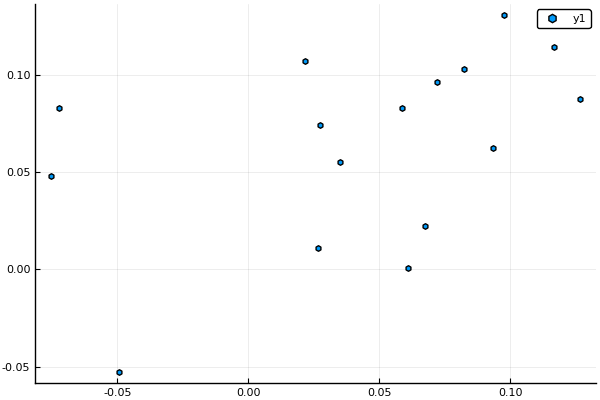

In [12]:
scatter(Flux.Tracker.data(s_seed[1,:]),Flux.Tracker.data(s_seed[2,:]), markershape = :hexagon)

In [13]:
scatter(Flux.Tracker.data(r[1,:]),Flux.Tracker.data(r[2,:]), markershape = :hexagon)

UndefVarError: UndefVarError: r not defined